In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()



In [6]:
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [10]:
# pulling in inspect method to study the columns to find the date
from sqlalchemy import inspect

inspector = inspect(engine)
m_columns = inspector.get_columns('Measurement')
s_columns = inspector.get_columns('Station')
for m_column in m_columns:
    print(m_column["name"], m_column["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
for s_column in s_columns:
    print(s_column["name"], s_column["type"])


id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
recent_date = session.query(Measurement.date)[-1]
recent_date

('2017-08-23')

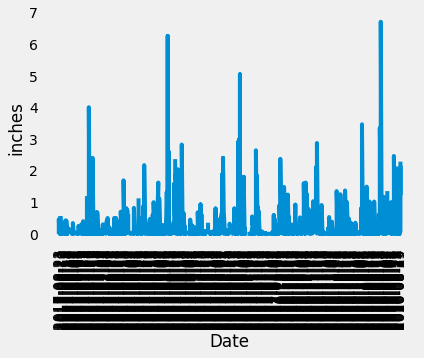

In [13]:
# Calculate the date one year from the last date in data set.
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 



# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
import datetime as dt

date = dt.datetime(2016, 8, 23)

plot_results = session.query(Measurement.prcp, Measurement.date).\
    filter(Measurement.date >= date).\
    order_by(Measurement.date.desc()).all()

p_date = [(result[1]) for result in plot_results[:-1]]

p_inches = [result[0] for result in plot_results[:-1]]
plt.plot(p_date, p_inches)
plt.ylabel("inches")
plt.xlabel("Date")

plt.xticks(rotation='90')
plt.grid()

plt.show()

        

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df = pd.DataFrame(plot_results, columns=['inches', 'date'])
df.describe()

,inches
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
tot_stat=session.query(Station.id).count()
tot_stat


9

In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
from sqlalchemy import func
activity=session.query(Station.id,Measurement.station, func.count(Measurement.id)).group_by(Measurement.station).\
    filter(Station.station==Measurement.station).\
    order_by(func.count(Measurement.id).desc()).all()
activity


[(7, 'USC00519281', 2772),
 (1, 'USC00519397', 2724),
 (2, 'USC00513117', 2709),
 (6, 'USC00519523', 2669),
 (9, 'USC00516128', 2612),
 (3, 'USC00514830', 2202),
 (8, 'USC00511918', 1979),
 (4, 'USC00517948', 1372),
 (5, 'USC00518838', 511)]

In [29]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

lowest_temp=session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station=='USC00519281').all()
highest_temp=session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station=='USC00519281').all()
avg_temp=session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station=='USC00519281').all()
lowest_temp, highest_temp, avg_temp

([(54.0)], [(85.0)], [(71.66378066378067)])

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()